# MAE6226 Homework 7

Li Lin

In [66]:
import math
import numpy as np
import numpy as np
np.set_printoptions(threshold=np.inf)
%matplotlib inline
import matplotlib.pyplot as plt

In [67]:
def JT(zeta, c):
    
    z = zeta+c**2/zeta
    
    return z

In [68]:
def Solve_m_delta(H,T):
    
    delta = math.atan(H/T*3*math.sqrt(3)/2)
    if delta<(math.pi/2):
        delta = math.pi-delta
    m = abs(T/(3*math.sqrt(3))/math.cos(delta))
    
    return delta, m

In [69]:
def BuildFoil(delta, m, l):
    
    c = l/4
    epsilon = m/c
    r0 = math.sqrt(m**2+c**2-2*m*c*math.cos(delta))
    Nr = 1
    Ngamma = 500
    rn = 0.8
    r = np.linspace(r0, rn, Nr)
    gamma = np.linspace(0, 2*math.pi, Ngamma)
    R, Gamma = np.meshgrid(r, gamma)
    zeta = R*np.exp(1j*Gamma)+m*np.exp(1j*delta)
    z = JT(zeta, c)
    fsize = 5
    plt.figure(figsize=(fsize, fsize))
    plt.xlim(x0, xn)
    plt.ylim(y0, yn)
    plt.scatter(z.real, z.imag, s = 2);
    
    return z
    

In [70]:
l = 1
c = l/4
T_a = 0.05
H_a = 0
T_b = 0.1
H_b = 0
T_c = 0.3
H_c = 0
T_d = 0.1
H_d = 0.02
T_e = 0.1
H_e = 0.05
T_f = 0.1
H_f = 0.1
delta_a, m_a = Solve_m_delta(H_a,T_a)
delta_b, m_b = Solve_m_delta(H_b,T_b)
delta_c, m_c = Solve_m_delta(H_c,T_c)
delta_d, m_d = Solve_m_delta(H_d,T_d)
delta_e, m_e = Solve_m_delta(H_e,T_e)
delta_f, m_f = Solve_m_delta(H_f,T_f)
print(delta_a, m_a)
print(delta_b, m_b)
print(delta_c, m_c)
print(delta_d, m_d)
print(delta_e, m_e)
print(delta_f, m_c)

3.141592653589793 0.009622504486493762
3.141592653589793 0.019245008972987525
3.141592653589793 0.057735026918962574
2.66237627274504 0.02168802366215904
2.226849700855236 0.031549490810001524
1.938218231414698 0.057735026918962574


In [71]:
N = 50
x0,xn = -0.8,0.8
y0,yn = -0.8,0.8
x = np.linspace(x0,xn,N)
y = np.linspace(y0,yn,N)
X,Y = np.meshgrid(x,y)

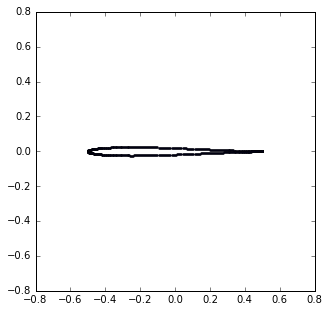

In [72]:
z_a = BuildFoil(delta_a, m_a, l)

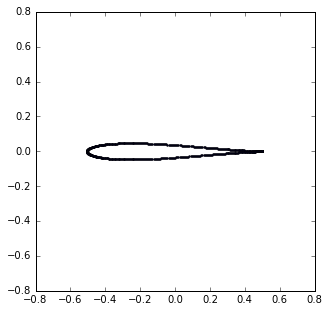

In [73]:
z_b = BuildFoil(delta_b, m_b, l)

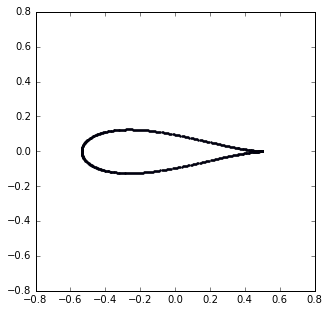

In [74]:
z_c = BuildFoil(delta_c, m_c, l)

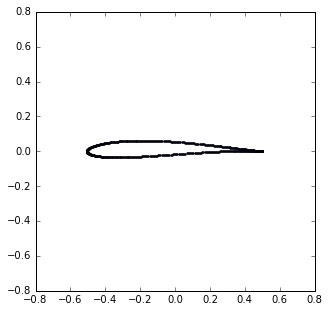

In [75]:
z_d = BuildFoil(delta_d, m_d, l)

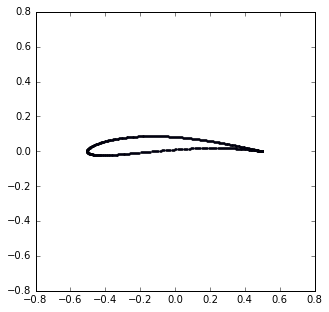

In [76]:
z_e = BuildFoil(delta_e, m_e, l)

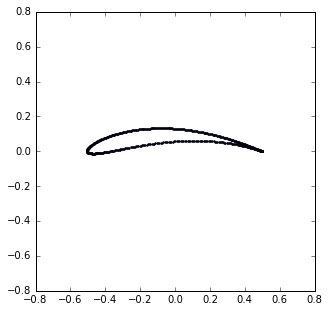

In [77]:
z_f = BuildFoil(delta_f, m_f, l)

## Problem 1

In [78]:
def find_H_T(z,l):

    size = len(z)
    temp_T = np.zeros(int(size/2))
    temp_H = np.zeros(int(size/2))
    for n in range (int(size/2)):
        temp_T[n] = z.imag[n] - z.imag[size-n-1]
        temp_H[n] = z.imag[size-n-1]+(z.imag[n] - z.imag[size-n-1])/2
    T = max(temp_T)/l
    H = max(temp_H)/l
    
    return T, H

In [79]:
Tnu_a, Hnu_a = find_H_T(z_a,l)
Tnu_b, Hnu_b = find_H_T(z_b,l)
Tnu_c, Hnu_c = find_H_T(z_c,l)
Tnu_d, Hnu_d = find_H_T(z_d,l)
Tnu_e, Hnu_e = find_H_T(z_e,l)
Tnu_f, Hnu_f = find_H_T(z_f,l)
print (Tnu_a, Hnu_a)
print (Tnu_b, Hnu_b)
print (Tnu_c, Hnu_c)
print (Tnu_d, Hnu_d)
print (Tnu_e, Hnu_e)
print (Tnu_f, Hnu_f)

0.0481962281373 5.55111512313e-17
0.0932064715884 3.46944695195e-17
0.250384840685 6.24500451352e-17
0.0937986710451 0.0186878294092
0.097051016364 0.046718481688
0.1102040466 0.0934300658486


All the thickness ratio results match well except the one when $T = 0.3$, the numerical value is $0.25$. Looks like when the thickness ratio increases, the accuracy decreases. But the camber ratio is always accurate.

## Problem 2

In [80]:
def MeshFoil(delta, m, l, Nr, Ngamma):
    
    c = l/4
    epsilon = m/c
    r0 = math.sqrt(m**2+c**2-2*m*c*math.cos(delta))
    rn = 2
    r = np.linspace(r0, rn, Nr)
    gamma = np.linspace(0, 2*math.pi, Ngamma)
    R, Gamma = np.meshgrid(r, gamma)
    zeta = R*np.exp(1j*Gamma)+m*np.exp(1j*delta)
    z = JT(zeta, c)
    
    return zeta, r0, z, R, Gamma

In [81]:
def zeta_stream(U_inf, AOA, m, delta, r0, zeta, c, R, Gamma):
    
    nu = m_d*math.cos(math.pi-delta_d)+c+1j*m_d*math.sin(math.pi-delta_d)
    gamma = 4*math.pi*U_inf*r0*np.sin(AOA+np.arcsin(nu.imag/r0))
    kappa = r0**2*2*math.pi*U_inf
    stream_zeta = U_inf*np.cos(AOA)*R*np.sin(Gamma)-U_inf*np.sin(AOA)*R*np.cos(Gamma)\
    +gamma/(2*math.pi)*np.log(R)-kappa/(2*math.pi)*np.sin(Gamma)/R
    
    return stream_zeta
    

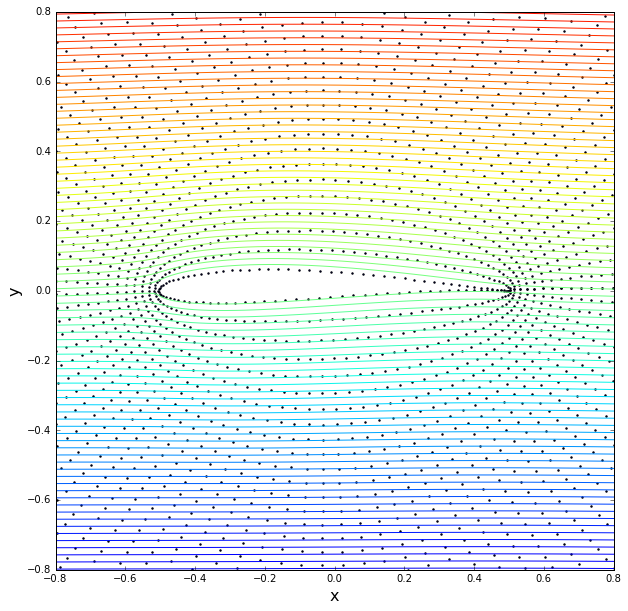

In [82]:
Nr = 50
Ngamma = 100
U_inf = 1
AOA_d = 0
zeta_d, r0_d, z_d, R_d, Gamma_d = MeshFoil(delta_d,m_d,l,Nr,Ngamma)
stream_zeta_d = zeta_stream(U_inf, AOA_d, m_d, delta_d, r0_d, zeta_d, c, R_d, Gamma_d)
fsize = 10
plt.figure(figsize=(fsize, (yn-y0)/(xn-x0)*fsize))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x0, xn)
plt.ylim(y0, yn)
plt.scatter(z_d.real, z_d.imag, s=2);
plt.contour(z_d.real,z_d.imag,stream_zeta_d,levels = np.linspace(-1,1,100),linewidth = 8);

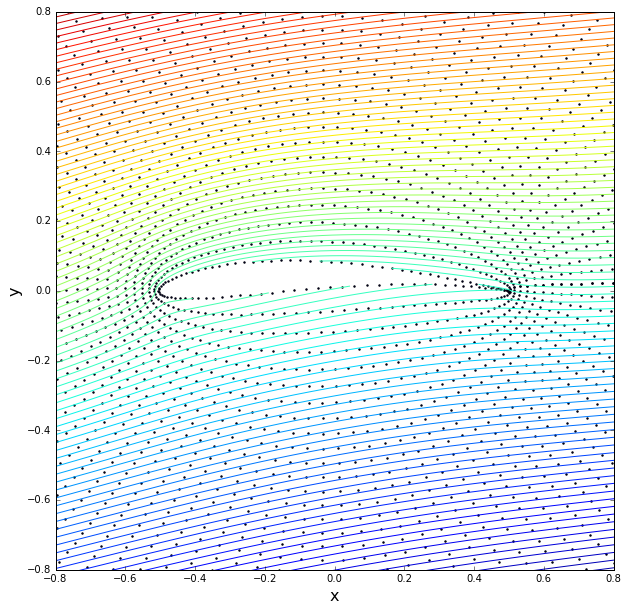

In [83]:
AOA_e = 10/180*math.pi
zeta_e, r0_e, z_e, R_e, Gamma_e = MeshFoil(delta_e,m_e,l,Nr,Ngamma)
stream_zeta_e = zeta_stream(U_inf, AOA_e, m_e, delta_e, r0_e, zeta_e, c, R_e, Gamma_e)
stream_e = JT(stream_zeta_e,c)
fsize = 10
plt.figure(figsize=(fsize, (yn-y0)/(xn-x0)*fsize))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x0, xn)
plt.ylim(y0, yn)
plt.scatter(z_e.real, z_e.imag, s=2);
plt.contour(z_e.real,z_e.imag,stream_zeta_e,levels = np.linspace(-1,1,100),linewidth = 8);

## Peoblem 3

In [84]:
def zeta_velocity(U_inf, AOA, m, delta, r0, c, Ngamma):
    
    Gamma = np.linspace(0,2*math.pi,Ngamma)
    nu = -m_d*math.cos(math.pi-delta_d)+c+1j*m_d*math.sin(math.pi-delta_d)
    gamma = 4*math.pi*U_inf*r0*np.sin(AOA+np.arcsin(nu.imag/r0))
    #vt = -2*U_inf*np.sin(Gamma[:,0]-delta)+gamma/(2*math.pi*r0)
    kappa = r0**2*2*math.pi*U_inf
    vt = U_inf*np.cos(AOA)*np.sin(Gamma)-U_inf*np.sin(AOA)*np.cos(Gamma)+gamma/(r0*2*math.pi)+\
    kappa/(2*math.pi*r0**2)*np.sin(Gamma)
    w_zeta = vt
    print (vt)
    return w_zeta

[ 0.0742306   0.20107844  0.32741551  0.45273309  0.57652658  0.6982975
  0.81755552  0.93382043  1.04662408  1.15551224  1.26004646  1.35980582
  1.45438863  1.54341402  1.62652353  1.70338251  1.77368146  1.83713733
  1.8934946   1.94252633  1.98403509  2.01785374  2.04384611  2.06190753
  2.07196528  2.07397886  2.06794016  2.05387349  2.0318355   2.00191492
  1.96423224  1.91893919  1.86621815  1.80628141  1.73937031  1.66575429
  1.58572975  1.49961895  1.40776861  1.31054858  1.20835033  1.10158539
  0.99068365  0.87609168  0.75827089  0.63769572  0.51485167  0.3902334
  0.26434269  0.13768647  0.01077474 -0.11588148 -0.24177219 -0.36639046
 -0.48923451 -0.60980968 -0.72763047 -0.84222244 -0.95312418 -1.05988912
 -1.16208737 -1.2593074  -1.35115774 -1.43726854 -1.51729308 -1.5909091
 -1.6578202  -1.71775694 -1.77047798 -1.81577103 -1.85345371 -1.88337429
 -1.90541228 -1.91947895 -1.92551765 -1.92350407 -1.91344632 -1.8953849
 -1.86939253 -1.83557388 -1.79406512 -1.74503339 -1.688

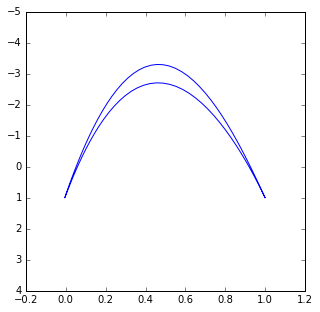

In [85]:
w_zeta_d = zeta_velocity(U_inf, AOA_d, m_d, delta_d, r0_d, c, Ngamma)
w_d = JT(w_zeta_d,c)
Cp = 1-w_zeta_d**2/U_inf**2
fsize = 5
plt.figure(figsize=(fsize, (yn-y0)/(xn-x0)*fsize))
plt.xlim(-0.2,1.2)
plt.ylim(4, -5)
plt.plot(z_d.real[:,0]+0.5,Cp);

[ 0.24625056  0.37248446  0.49890928  0.62501595  0.75029668  0.87424702
  0.99636786  1.11616747  1.23316344  1.34688468  1.45687328  1.56268635
  1.66389781  1.76010014  1.85090594  1.93594958  2.01488862  2.0874052
  2.15320732  2.21203001  2.26363643  2.30781877  2.34439911  2.37323018
  2.39419587  2.40721176  2.41222544  2.40921672  2.39819773  2.37921282
  2.35233845  2.31768282  2.27538549  2.22561676  2.16857705  2.10449603
  2.03363173  1.95626949  1.87272083  1.78332218  1.68843349  1.58843686
  1.48373495  1.37474934  1.26191888  1.14569791  1.0265544   0.9049681
  0.7814286   0.65643334  0.53048564  0.40409265  0.27776331  0.15200629
  0.02732798 -0.09576958 -0.21679073 -0.33524816 -0.45066487 -0.56257614
 -0.67053132 -0.77409573 -0.87285234 -0.9664035  -1.05437251 -1.13640515
 -1.21217111 -1.28136529 -1.34370909 -1.39895146 -1.44686996 -1.48727164
 -1.51999382 -1.54490474 -1.56190409 -1.57092341 -1.5719264  -1.56490901
 -1.54989951 -1.52695831 -1.49617782 -1.45768196 -1.4

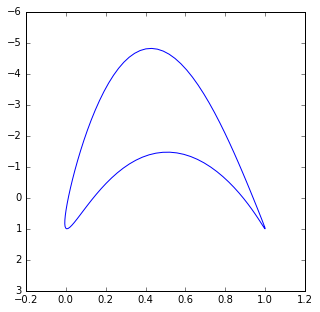

In [86]:
w_zeta_e = zeta_velocity(U_inf, AOA_e, m_e, delta_e, r0_e, c, Ngamma)
w_e = JT(w_zeta_e,c)
Cp = 1-w_zeta_e**2/U_inf**2
#for n in range (int(len(Cp)/2)):
    #Cp[n+int(len(Cp)/2)-1] = -Cp[n+int(len(Cp)/2)-1]
    #Cp[n-1] = -Cp[n-1]
fsize = 5
plt.figure(figsize=(fsize, (yn-y0)/(xn-x0)*fsize))
plt.xlim(-0.2,1.2)
plt.ylim(3, -6)
plt.plot(z_e.real[:,0]+0.5,Cp);